# The Numpy.Random Package - an overview

##### This notebook give a detailed overview of the Random Package, found in the Numpy library, including examples of its use. 

## Purpose
##### The NumPy.Random package is a sub-package of the NumPy library, a library in the Python programming language. The NumPy library provides functions and data structures that are useful for numerical processing for data analytics purposes. A common need in data analytics is generating random samples of data. The NumPy.Random package exists for this purpose. 

##### In this notebook, the primary uses of the NumPy.Random package are explained. Some functions in the package will be explained in detail, as will some distributions that the package can generate. The generation of random numbers using seeds will also be explained. 

In [1]:
# import numpy package for use in the notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Functions
##### What follows is an explanation of some basic funtions that can be found in the NumPy.Random package.
### Simple Random Data



### Permutation Function
##### In mathematics, a permutation describes the linear order of a set of numbers. 
##### The NumPy.Random package has a function that returns a random permutation of numbers depending on a set of inputs. The permutation is returned as an array.

In [ ]:
# The function can accept an integer, in this case, 8.
# This will return a random set of 8 integers from 0 up to but not including 8
np.random.permutation(8)

In [ ]:
# The function can also accept a list and return it with the items rearranged
np.random.permutation([23, 7, 1, 83, 31, 6, 301])

## Distributions
##### A probability distribution is a plot that shows the possible values a variable can be and how frequently the values occur. For example, the measurements of heights of members of a popluation shown in a histogram would show that most of the measurements cluster around an average/mean and get less frequent at taller and shorter heights. A mathematical function describes the curve under which the measurement frequencies will most likely be found, this gives the probability distribution. The distribution in this case would most likely be a "normal" or "Gaussian" distribution.

##### Probability distributions can be discrete (data can be only certain values) or continuous (data can be any value within a range). There exist different mathematical functions that describe the different probability distributions that can exist, depending on the circumstances of data selection and properties of the data. The Numpy.Random package has functions that are capable of randomly sampling data according to many different probability distributions. In this notebook, examples of five different probability distribution functions will be demonstrated using Numpy.Random to sample the data and Seaborn to visalise it. 

### Normal Distribution

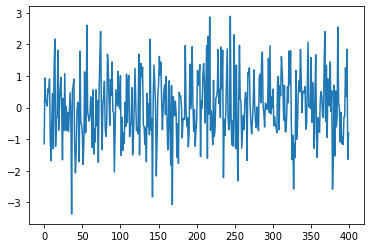

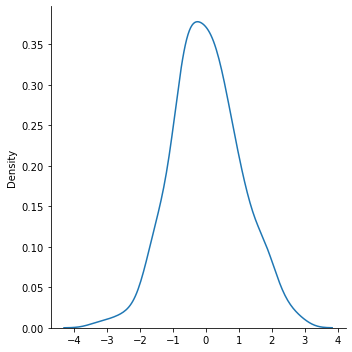

In [2]:
res_arr = np.random.normal(loc=0,scale=1,size=(400,))
plt.plot(res_arr)
sns.displot(res_arr, kind='kde')
plt.show()

#### Seeds

##### The purpose of seed is to provide a starting point for random number generation. It is difficult to truely randomly generate lists of numbers, so seeds are generated to begin the process. They are generated at the point in which the package is imported, and are typically based on the time of the machine. If one were to understand how the seed is generated, it would be possible to guess the list of numbers that are produced. 

#### PCG64 Algorithm

##### Notes here on the algorithm